In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 경로 확인
!pwd

/content/drive/My Drive/Colab Notebooks


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

# YOLO (You Only Look Once)

## XML 파일 불러오기

```
Multiple object detection인 경우 정형데이터로 구성할 수 없기 때문에 
xml이나 json과 같은 다양한 의미를 지닌 데이터 형식을 불러와야 할 때가 있다 
```

In [1]:
import tensorflow as tf 
import xml.etree.ElementTree as ET # xml 형식의 파일을 parsing하는 파이썬 라이브러리 
import pathlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpt

In [2]:
src = 'VOCdevkit/VOC2007/Annotations/000005.xml'

> 출처: http://host.robots.ox.ac.uk/pascal/VOC/voc2007/examples/index.html

In [3]:
tree = ET.parse(src) # xml 파알 구조 불러오기 (tree 형태로)
root = tree.getroot() # 시작지점 설정 (root 찾기)

In [4]:
root # annotation가 최상위 root (태그)

<Element 'annotation' at 0x16107dcc0>

In [5]:
for i in root.iter('object'): # 5개 object가 있다 / name / pose / truncated /diffiicult / bndbox
    print(i)

<Element 'object' at 0x163992a90>
<Element 'object' at 0x163992db0>
<Element 'object' at 0x163995130>
<Element 'object' at 0x163995450>
<Element 'object' at 0x163995770>


In [6]:
for i in root.iter('object'): # object에 대한 정보만 필요하기 때문에 object태그의 하위 요소만 불러온다
    difficult = i.find('difficult').text
    cls = i.find('name').text

### Class 이름 key, value 쌍 만들기 

In [7]:
classes = '''
Aeroplanes
Bicycles
Birds
Boats
Bottles
Buses
Cars
Cats
Chairs
Cows
Dining tables
Dogs
Horses
Motorbikes
People
Potted plants
Sheep
Sofas
Trains
TVMonitors
'''

In [8]:
classes = [i.lower() for i in classes.strip().split('\n')]

In [9]:
classes = [i[:-1] if i[-1]=='s' else i for i in classes]

In [10]:
classes

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'buse',
 'car',
 'cat',
 'chair',
 'cow',
 'dining table',
 'dog',
 'horse',
 'motorbike',
 'people',
 'potted plant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [11]:
classes = ['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'people',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [12]:
classes = dict(zip(classes, range(20)))

In [13]:
def annote(img_id):
    '''
    20개 클래스에 해당하는 class id와 4가지 위치 정보를 반환하는 함수 
    '''
    src = f'VOCdevkit/VOC2007/Annotations/{img_id}.xml'
    tree = ET.parse(src)
    root = tree.getroot()
    temp = []
    for i in root.iter('object'):
        difficult = i.find('difficult').text
        cls = i.find('name').text
        if cls not in classes: #  or int(difficult) == 1
            continue
        cls_id = classes[cls]
        xmlbox = i.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        ymin = int(xmlbox.find('ymin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymax = int(xmlbox.find('ymax').text)
        
        bb = (xmin,ymin,xmax,ymax)
        temp.append((cls_id, bb))
    return temp

In [14]:
path = pathlib.Path('VOCdevkit/VOC2007/Annotations')

In [15]:
for i in path.iterdir():
    print(str(i).split('/')[-1].split('.')[0])

007826
002786
006286
002962
008297
009189
009823
002976
002745
006523
008268
004452
002023
005980
004446
002037
009162
006251
000620
000146
007629
001258
002751
002989
007601
001270
002779
005016
003301
006279
007167
008254
000608
005764
007615
008526
009638
006084
001933
004693
002584
008917
000387
003856
002590
004687
005599
001927
008095
006912
004863
002221
007359
009374
009412
004136
002547
004122
003895
006735
009406
008718
000344
004644
007365
009348
001714
003103
005214
001072
008730
001066
006709
007417
003671
002209
005566
003117
008042
001847
000581
003088
003936
006696
006682
004095
002382
001853
004903
008687
006866
002355
006133
009200
000224
009566
002433
002427
005348
006899
009214
008122
007211
003077
004718
005406
002369
005360
003711
000218
008644
001106
007563
001112
008888
005374
003705
003063
007205
004283
002194
000797
002180
005189
007946
006480
002816
008485
000967
000973
007991
009764
007749
000026
000740
009002
004526
004532
000754
009016
006325
006443
000032

002738
005057
004349
005731
001557
006238
008942
009484
003817
001972
003803
009490
006953
001782
003195
003181
004836
007481
006947
004163
002512
008759
000305
000463
006012
004605
002260
004611
000477
007318
008995
006760
000311
003618
005269
001027
006748
006990
002248
005527
001999
007330
001741
008017
009309
001755
003142
008771
008836
003963
008188
009296
001806
009282
008822
006827
004956
001184
006833
003793
002466
004017
009533
006166
009255
002300
006172
000503
008639
009527
002472
004003
005453
004995
009269
008177
007244
008163
007250
002328
003988
003750
000259
007536
006628
001147
009094
009080
003585
009902
001386
000926
005686
002102
008349
000073
004215
002664
004201
002670
002116
005679
000729
007046
005889
003546
002880
004229
002658
007720
008413
001345
009719
005645
007052
005122
007735
009718
008360
005644
005888
001436
008374
000728
007721
001350
002659
005136
004228
002881
000066
007709
006417
009724
001378
004200
004566
002117
006371
009042
000700
000714
000072

In [16]:
imgs = [str(i).split('/')[-1].split('.')[0] for i in path.iterdir()]

In [17]:
imgs

['007826',
 '002786',
 '006286',
 '002962',
 '008297',
 '009189',
 '009823',
 '002976',
 '002745',
 '006523',
 '008268',
 '004452',
 '002023',
 '005980',
 '004446',
 '002037',
 '009162',
 '006251',
 '000620',
 '000146',
 '007629',
 '001258',
 '002751',
 '002989',
 '007601',
 '001270',
 '002779',
 '005016',
 '003301',
 '006279',
 '007167',
 '008254',
 '000608',
 '005764',
 '007615',
 '008526',
 '009638',
 '006084',
 '001933',
 '004693',
 '002584',
 '008917',
 '000387',
 '003856',
 '002590',
 '004687',
 '005599',
 '001927',
 '008095',
 '006912',
 '004863',
 '002221',
 '007359',
 '009374',
 '009412',
 '004136',
 '002547',
 '004122',
 '003895',
 '006735',
 '009406',
 '008718',
 '000344',
 '004644',
 '007365',
 '009348',
 '001714',
 '003103',
 '005214',
 '001072',
 '008730',
 '001066',
 '006709',
 '007417',
 '003671',
 '002209',
 '005566',
 '003117',
 '008042',
 '001847',
 '000581',
 '003088',
 '003936',
 '006696',
 '006682',
 '004095',
 '002382',
 '001853',
 '004903',
 '008687',
 '006866',

In [18]:
'VOCdevkit/VOC2007/JPEGImages/'+imgs[0]+'.jpg'

'VOCdevkit/VOC2007/JPEGImages/007826.jpg'

In [19]:
temp = [
]
for i in imgs:
    temp.append(annote(i))

In [20]:
len(temp)

5011

In [21]:
temp

[[(10, (80, 217, 320, 273)),
  (8, (197, 193, 257, 326)),
  (8, (139, 184, 185, 231)),
  (8, (258, 180, 312, 314)),
  (8, (10, 195, 93, 358)),
  (8, (82, 252, 243, 372)),
  (8, (43, 319, 144, 375))],
 [(12, (80, 97, 348, 272))],
 [(10, (402, 219, 500, 375)),
  (10, (347, 177, 405, 216)),
  (10, (160, 167, 203, 188)),
  (10, (104, 185, 209, 279)),
  (10, (1, 322, 82, 375)),
  (10, (2, 169, 53, 225)),
  (8, (408, 241, 500, 375)),
  (8, (49, 178, 135, 279)),
  (8, (135, 164, 167, 188)),
  (8, (150, 184, 233, 290)),
  (8, (19, 167, 65, 231)),
  (8, (56, 163, 95, 209)),
  (8, (97, 177, 152, 203)),
  (8, (184, 166, 231, 194)),
  (8, (196, 181, 240, 208)),
  (8, (400, 178, 454, 232)),
  (8, (1, 169, 32, 174))],
 [(19, (430, 121, 500, 205))],
 [(2, (2, 2, 500, 375))],
 [(9, (464, 241, 500, 291)),
  (9, (405, 226, 449, 281)),
  (9, (304, 224, 366, 261)),
  (9, (231, 212, 287, 245)),
  (9, (123, 186, 227, 250)),
  (9, (70, 178, 120, 237))],
 [(11, (3, 4, 498, 374))],
 [],
 [(4, (213, 59, 312, 44

In [22]:
annote(imgs[0])

[(10, (80, 217, 320, 273)),
 (8, (197, 193, 257, 326)),
 (8, (139, 184, 185, 231)),
 (8, (258, 180, 312, 314)),
 (8, (10, 195, 93, 358)),
 (8, (82, 252, 243, 372)),
 (8, (43, 319, 144, 375))]

In [23]:
def show(img_id):
    '''
    이미지에 bounding box 그리는 함수 
    '''
    im = plt.imread('VOCdevkit/VOC2007/JPEGImages/'+str(imgs[img_id])+'.jpg')
    fig, ax = plt.subplots(1,1)
    for i in annote(imgs[img_id]):
        rec = mpt.Rectangle((i[1][0],i[1][1]), i[1][2]-i[1][0], i[1][3]-i[1][1], edgecolor='red', fill=False)
        ax.add_patch(rec)
    ax.imshow(im)

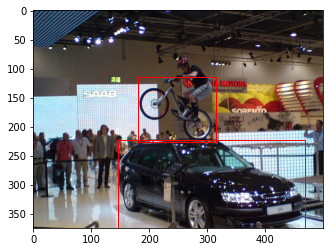

In [24]:
show(100)

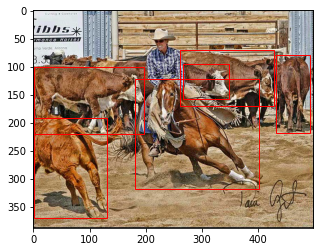

In [25]:
show(1100)

```python
데이터 불러와서 학습 데이터 구성하는 방법 (모델에 학습 데이터를 전달하기 위한/Multiple object)

1. 데이터를 파일로 부터 불러온다 
2. 원하는 데이터 구조로 데이터를 가공한다 # ex) 'filename', (10,20,100,200), '1' 
3. DataFrame 형태로 변환한다 
4. Generator 형태로 만들거나 tf.data.Dataset으로 만든다 
```

In [26]:
# 상속하는 방식(프레임워크에 한정적이지만 tensorflow에 최적화된 기능을 사용할 수 있다) / seqence data처럼 사용할 수 있기 때문에 학습 데이터 유연하게 전달할 수 있다
tf.keras.utils.Sequence 

keras.utils.data_utils.Sequence

In [20]:
tf.keras.preprocessing.image_dataset_from_directory()
tf.keras.preprocessing.image.ImageDataGenerator() 
flow_from_directory 
flow_from_dataframe  # geneartor tf.data.Dataset

TypeError: image_dataset_from_directory() missing 1 required positional argument: 'directory'

```
Numpy 형태 데이터를 학습을 하면 자동으로 tensor로 변환하여 학습이 가능하긴 하지만 
이러한 tensor는 데이터 전체 메모리를 한꺼번에 올리기 때문에 컴퓨터 성능에 따라 학습이 불가능할 수도 있다 
뿐만아니라 메모리를 효율적으로 사용하지 못하기 때문에 학습 속도가 비교적 느릴 수 있다 

반면 tf.data.Dataset은 내부적으로 최적화 되어 있기 때문에 cpu, gpu를 동시에 사용하거나 
prefetch, cache기법 등 다양한 방법으로 최적화된 학습이 가능하다 
따라서 데이터를 generator형태로 불러오거나 tf.data.Dataset으로 변환하는 과정은 중요하다
(단, lazy 방식으로 만들어져 있기 때문에 데이터 하나 확인하는 것이 매우 까다롭다 
```

## Network Design

In [27]:
lre = tf.keras.layers.LeakyReLU(alpha=0.1) # 자주 쓰는 것들은 layers에 포함되어 있다 

input_ = tf.keras.Input((448,448,3))
x = tf.keras.layers.Conv2D(64,7,2, padding='same', activation=lre)(input_) 
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.Conv2D(192,3, padding='same', activation=lre)(x)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.Conv2D(128,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(256,3, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(256,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(512,3, padding='same', activation=lre)(x)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.Conv2D(256,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(512,3, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(256,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(512,3, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(256,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(512,3, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(256,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(512,3, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(512,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(1024,3, padding='same', activation=lre)(x)
x = tf.keras.layers.MaxPool2D(2,2)(x)
x = tf.keras.layers.Conv2D(512,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(1024,3, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(512,1, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(1024,3, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(1024,3,2, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(1024,3, padding='same', activation=lre)(x)
x = tf.keras.layers.Conv2D(1024,3, padding='same', activation=tf.keras.activations.linear)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation=lre)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1470)(x) 
x = tf.keras.layers.Reshape((7,7,30))(x)

2021-10-27 15:24:33.147557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-27 15:24:33.148240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [28]:
model = tf.keras.models.Model(input_, x)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 192)     110784    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 192)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       24704     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       295168

### Leaky ReLU

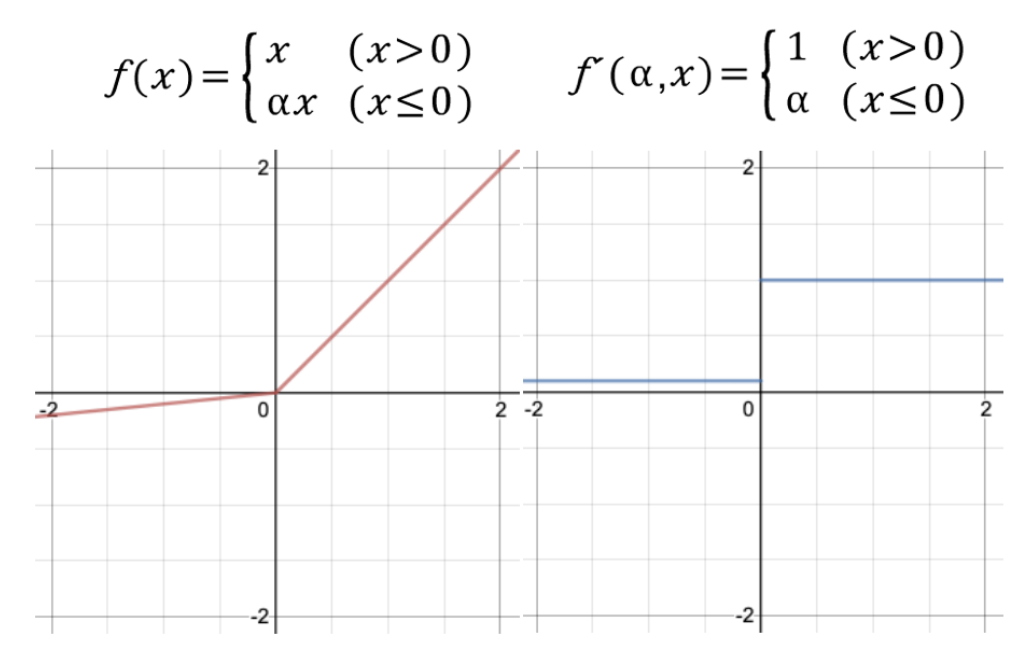

## Loss function

```
10개 -> 두 개의 bounding box / 20개 -> 각각의 클래스 확률 결과를 도출하기 위해서는 
Custom layers를 통해 직접 loss function을 구현해야 한다 
```

## Regression

```
Activation function을 linear함수(값의 범위만 정한다)를 사용하거나 사용하지 않으면 Regression 모델을 만들 수 있다 
Loss function을 Crossentropy대신 MSE를 사용하면 된다 
```

In [ ]:
!pip install -U tensorflow-addons # 최신 기법 + 중요성이 살짝 떨어지는 것들을 모아둔 추가 패키지 / 기본 tensorflow에 없는 layer를 사용할 수 있다 

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [129]:
!pip install typeguard

In [127]:
# How to install tensorflow addons on mac with m1
!pip install --upgrade --force --no-dependencies https://github.com/apple/tensorflow_macos/releases/download/v0.1alpha3/tensorflow_addons_macos-0.1a3-cp38-cp38-macosx_11_0_arm64.whl

     |████████████████████████████████| 598 kB 9.9 MB/s            
